<a href="https://colab.research.google.com/github/Dola108/1Tag.github.io/blob/master/diabetic%20retinopathy_v_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
#from google.colab import files
#files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
#!ls -lha kaggle.json

In [0]:
#!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
#!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle datasets list -s diabetic

In [0]:
# Copy the stackoverflow data set locally.
#!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized

In [0]:
#!unzip diabetic-retinopathy-resized.zip

In [7]:
#!head ~/.kaggle/datasets/tanlikesmath/diabetic-retinopathy-resized/trainLabels.csv
import os
os.listdir()

['.config', 'keras_script.py', '.ipynb_checkpoints', 'sample_data']

In [8]:
# Importing modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os, random, cv2
%matplotlib inline
# Let's check the labels
labels_df = pd.read_csv("trainLabels.csv")
labels_df.head()

FileNotFoundError: ignored

In [6]:
listing = "resized_train_cropped/resized_train_cropped"
print(listing)
from sklearn.cluster import KMeans
from scipy.ndimage.morphology import binary_fill_holes
import cv2                         # To read and manipulate images
import os                          # For filepath, directory handling
import sys                         # System-specific parameters and functions
import tqdm                        # Use smart progress meter
import seaborn as sns              # For pairplots
import matplotlib.pyplot as plt    # Python 2D plotting library
import matplotlib.cm as cm         # Color map
%matplotlib inline 
#print(listing)

from tqdm import tqdm
cc=0
for img in os.listdir(listing):  # iterate over each image per dogs and cats
     img_array = cv2.imread(os.path.join(listing,img) ,cv2.IMREAD_COLOR)  # convert to array
     plt.imshow(img_array)  # graph it
     plt.show()  # display!
     print(img_array.shape)
     cc=cc+1
     if cc>10:
        break

resized_train_cropped/resized_train_cropped


FileNotFoundError: ignored

In [0]:
from PIL import Image
from keras.preprocessing import image
#import numpy as np

# resize the image to (256, 256)
img_rows, img_cols = 256, 256

listing = os.listdir("resized_train/resized_train") 
#print(listing)
#listing.remove("trainLabels.csv")

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("resized_train/" + file)
    #print(base)
    fileName = os.path.splitext(base)[0]
    #print(labels_df.loc[labels_df.image==fileName, 'level'].values[0])
    #print(fileName)
    imlabel.append(labels_df.loc[labels_df.image==fileName, 'level'].values[0])
    im = Image.open("resized_train/resized_train/" + file,'r')
    img = np.array(im.resize((img_rows,img_cols)))
    
    #convert to green channel only
    img[:,:,[0,2]] = 0
    immatrix.append(img)
    print(immatrix)
    print(imlabel)
    break

Using TensorFlow backend.


[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 1, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)]
[0]


In [0]:
from keras.preprocessing import image

# resize the image to (256, 256)
img_rows, img_cols = 256, 256

listing = os.listdir("resized_train/resized_train") 

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("resized_train/" + file)
    #print(base)
    fileName = os.path.splitext(base)[0]
    #print(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    #print(fileName)
    imlabel.append(labels_df.loc[labels_df.image==fileName, 'level'].values[0])
    im = Image.open("resized_train/resized_train/" + file,'r')
    img = np.array(im.resize((img_rows,img_cols)))
    
    #convert to green channel only
    img[:,:,[0,2]] = 0
    immatrix.append(img)
    

level: 2


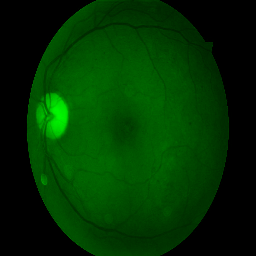

In [0]:
im = Image.fromarray(immatrix[1],'RGB')
print("level:",imlabel[1])
im

In [0]:
import random

# define transformation methods
def horizontal_flip(image_array):
    return image_array[:, ::-1]

def vertical_flip(image_array):
    return image_array[::-1,:]

def random_transform(image_array):
    if random.random() < 0.5:
        return vertical_flip(image_array)
    else:
        return horizontal_flip(image_array)

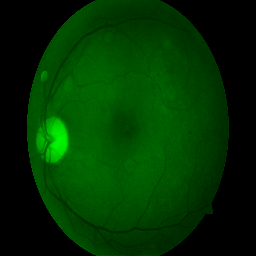

In [0]:
im = Image.fromarray(vertical_flip(immatrix[1]),'RGB')
im

In [0]:
length = len(immatrix)
for i in range(length):
    if random.random() < 0.1:
        immatrix.append(random_transform(immatrix[i]))
        imlabel.append(imlabel[i])
        
print("Size of image array before augmentation: ", length)
print("Size fo image array after augmentation: ", len(immatrix))

Size of image array before augmentation:  35126
Size fo image array after augmentation:  38618


In [0]:
from sklearn.utils import shuffle

data,label = shuffle(immatrix, imlabel, random_state=42)
train_data = [data,label]

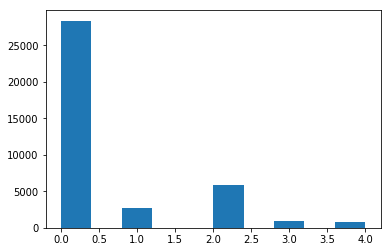

In [0]:
import matplotlib.pyplot as plt

plt.hist(label)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size = 0.2, random_state = 42)

print(np.array(x_train).shape)
print(np.array(y_train).shape)

(30894, 256, 256, 3)
(30894,)


In [1]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(np.array(y_train), 5)
y_test = np_utils.to_categorical(np.array(y_test), 5)

x_train = np.array((x_train), dtype=np.float32)/255
x_test = np.array((x_test), dtype=np.float32)/255

print(np.array(y_train).shape)

Using TensorFlow backend.


NameError: ignored

In [0]:

#partition = ['train', 'validation']